In [22]:
import yfinance as yf
import pandas as pd


In [23]:
df= yf.download(tickers='TCS.NS', period='2y', interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-09,3195.000000,3233.500000,3168.500000,3217.649902,3062.515869,1561185
2022-09-12,3239.899902,3269.800049,3225.000000,3242.949951,3086.596436,1785928
2022-09-13,3263.449951,3263.449951,3225.000000,3229.350098,3073.651855,1972678
2022-09-14,3135.000000,3141.399902,3113.800049,3120.399902,2969.954346,5090269
2022-09-15,3130.000000,3137.750000,3100.000000,3104.350098,2954.678711,2138023


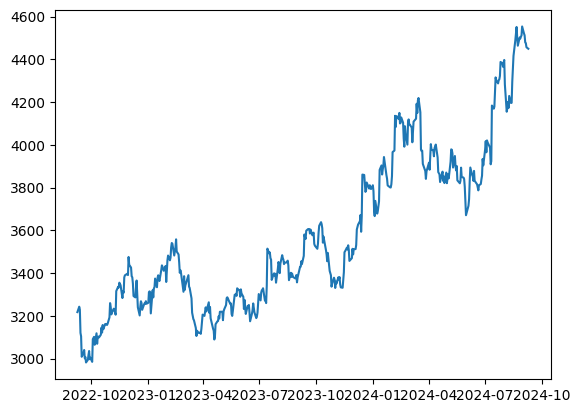

In [24]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()

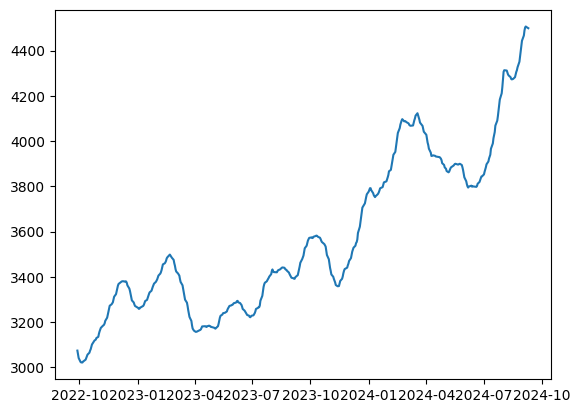

In [25]:
# moving avg
df['ma']= df['Close'].rolling(window=14).mean()
plt.plot(df['ma'])
plt.show()

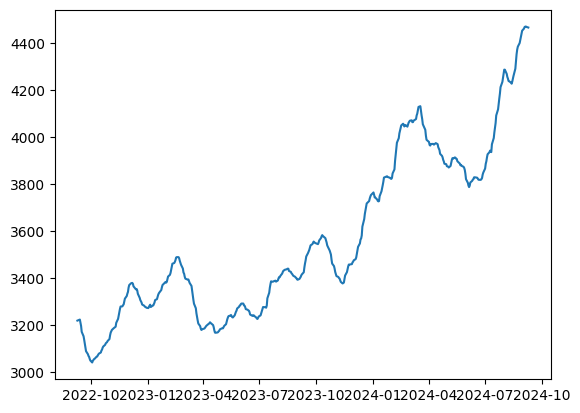

In [26]:
#exp moving avg
df['ema']= df['Close'].ewm(span= 14, adjust=False).mean()
plt.plot(df['ema'])
plt.show()

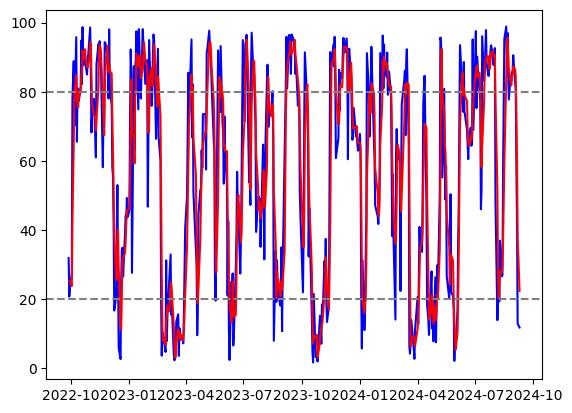

In [27]:
#stochastic oscillator
low= df['Low'].rolling(window=14).min()
high= df['High'].rolling(window=14).max()
df['%k']= 100*(df['Close']-low)/(high-low)
df['%d']=df['%k'].rolling(window=3).mean()

plt.plot(df['%k'], label='%K (14-day)', color='blue')
plt.plot(df['%d'], label='%D (3-day SMA of %K)', color='red')
plt.axhline(80, color='grey', linestyle='--')  # Overbought line
plt.axhline(20, color='grey', linestyle='--')  # Oversold line

Text(0.5, 1.0, 'MACD Histogram')

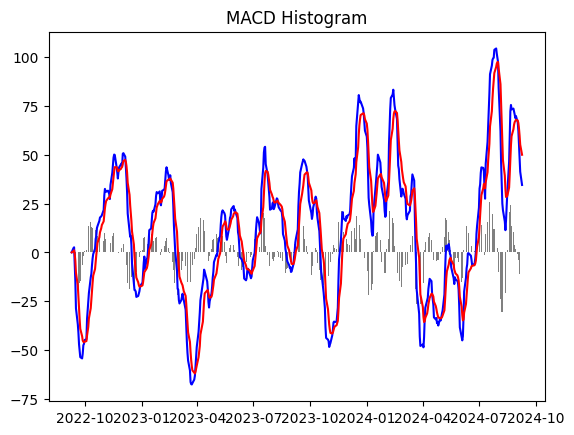

In [28]:
#macd

ewm10= df['Close'].ewm(span=10, adjust=False).mean()
ewm20= df['Close'].ewm(span=20, adjust=False).mean()
macd= ewm10-ewm20
df['SignalLine']= macd.ewm(span=7, adjust=False).mean()
df['macd_Histogram']= macd- df['SignalLine']
plt.plot(macd, label='MACD Line', color='blue')
plt.plot(df['SignalLine'], label='Signal Line', color='red')

plt.bar(df.index, df['macd_Histogram'], label='MACD Histogram', color='gray')
plt.title('MACD Histogram')

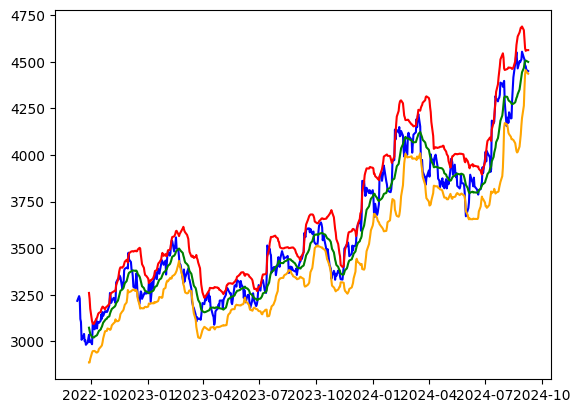

In [29]:
#bollinger bands

# df.head()

df['sd']= df['Close'].rolling(window=14).std()
df['upperband']= df['ma']+ 2*df['sd']
df['lowerband']= df['ma']- 2*df['sd']

plt.plot(df['Close'], color='blue')
plt.plot(df['ma'], color='green')
plt.plot(df['upperband'],label='upperband', color='red')
plt.plot(df['lowerband'], label='upperband', color='orange')



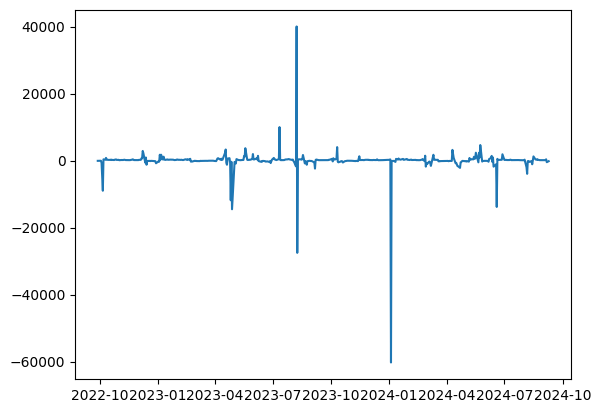

In [30]:
#rsi

close= df['Close']
delta= close.diff()
gain= (delta.where(delta>0,0)).rolling(window=14).mean()
lose= (delta.where(delta<0,0)).rolling(window=14).mean()
rs= gain/lose
df['rsi']= 100- (100/(1+rs))

plt.plot(df['rsi'])
plt.show()



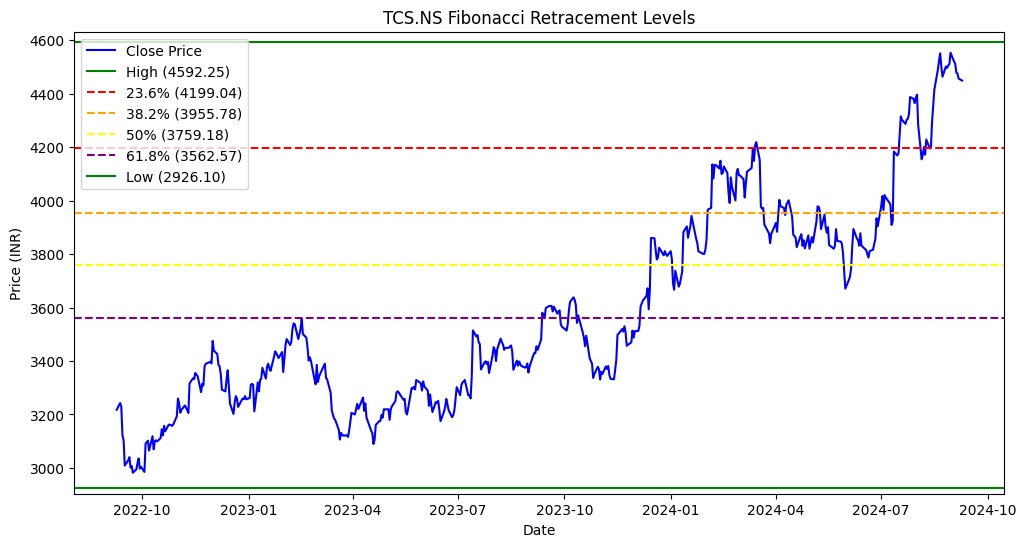

High: 4592.25
23.6% level: 4199.04
38.2% level: 3955.78
50% level: 3759.18
61.8% level: 3562.57
Low: 2926.10


In [31]:
high = df['High'].max()
low = df['Low'].min()

diff = high - low
level_23_6 = high - 0.236 * diff
level_38_2 = high - 0.382 * diff
level_50 = high - 0.5 * diff
level_61_8 = high - 0.618 * diff
level_100 = low

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')

plt.axhline(high, label=f'High ({high:.2f})', color='green')
plt.axhline(level_23_6, label=f'23.6% ({level_23_6:.2f})', linestyle='--', color='red')
plt.axhline(level_38_2, label=f'38.2% ({level_38_2:.2f})', linestyle='--', color='orange')
plt.axhline(level_50, label=f'50% ({level_50:.2f})', linestyle='--', color='yellow')
plt.axhline(level_61_8, label=f'61.8% ({level_61_8:.2f})', linestyle='--', color='purple')
plt.axhline(level_100, label=f'Low ({level_100:.2f})', color='green')

plt.title('TCS.NS Fibonacci Retracement Levels')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.show()

print(f"High: {high:.2f}")
print(f"23.6% level: {level_23_6:.2f}")
print(f"38.2% level: {level_38_2:.2f}")
print(f"50% level: {level_50:.2f}")
print(f"61.8% level: {level_61_8:.2f}")
print(f"Low: {low:.2f}")

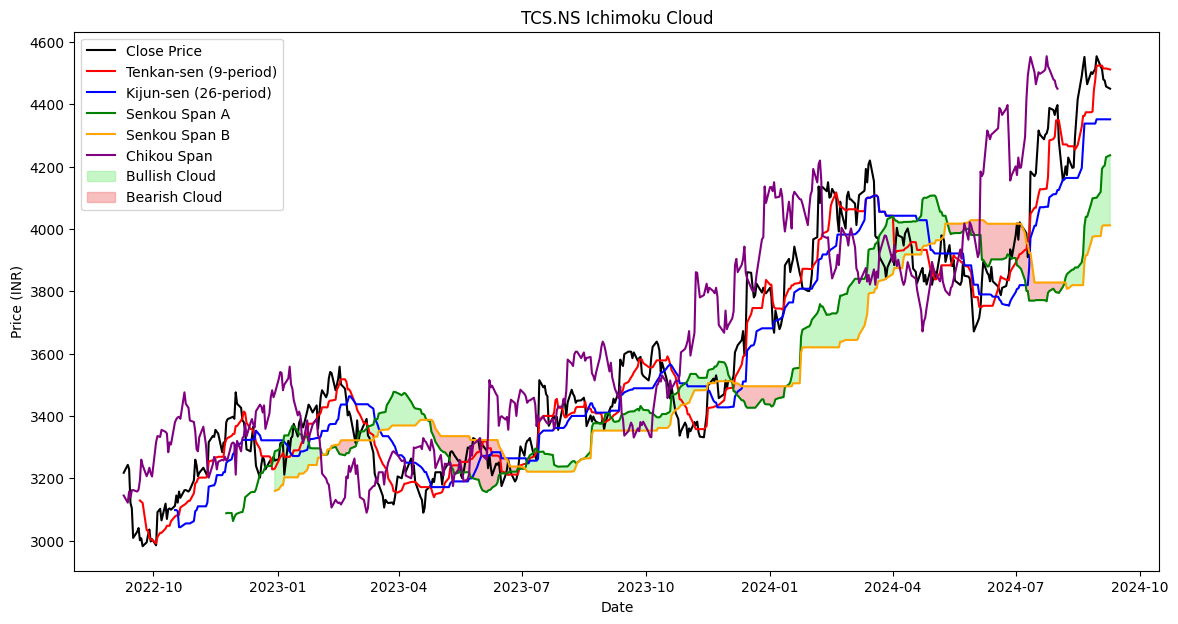

                  Close   Tenkan-sen  Kijun-sen  Senkou Span A  Senkou Span B  \
Date                                                                            
2024-09-03  4512.350098  4523.625000   4351.375    4192.462585    4006.975098   
2024-09-04  4479.250000  4514.475098   4351.375    4199.549988    4011.250000   
2024-09-05  4475.950195  4514.475098   4351.375    4203.325012    4011.250000   
2024-09-06  4456.750000  4514.475098   4351.375    4229.974976    4011.250000   
2024-09-09  4449.549805  4511.375000   4351.375    4236.275024    4011.250000   

            Chikou Span  
Date                     
2024-09-03          NaN  
2024-09-04          NaN  
2024-09-05          NaN  
2024-09-06          NaN  
2024-09-09          NaN  


In [32]:
df['Tenkan-sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
df['Kijun-sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2
df['Senkou Span A'] = ((df['Tenkan-sen'] + df['Kijun-sen']) / 2).shift(26)
df['Senkou Span B'] = ((df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2).shift(26)
df['Chikou Span'] = df['Close'].shift(-26)

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')

plt.plot(df['Tenkan-sen'], label='Tenkan-sen (9-period)', color='red')
plt.plot(df['Kijun-sen'], label='Kijun-sen (26-period)', color='blue')
plt.plot(df['Senkou Span A'], label='Senkou Span A', color='green')
plt.plot(df['Senkou Span B'], label='Senkou Span B', color='orange')
plt.plot(df['Chikou Span'], label='Chikou Span', color='purple')

plt.fill_between(df.index, df['Senkou Span A'], df['Senkou Span B'], where=(df['Senkou Span A'] >= df['Senkou Span B']), color='lightgreen', alpha=0.5, label='Bullish Cloud')
plt.fill_between(df.index, df['Senkou Span A'], df['Senkou Span B'], where=(df['Senkou Span A'] < df['Senkou Span B']), color='lightcoral', alpha=0.5, label='Bearish Cloud')

plt.title('TCS.NS Ichimoku Cloud')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='best')
plt.show()

print(df[['Close', 'Tenkan-sen', 'Kijun-sen', 'Senkou Span A', 'Senkou Span B', 'Chikou Span']].tail())

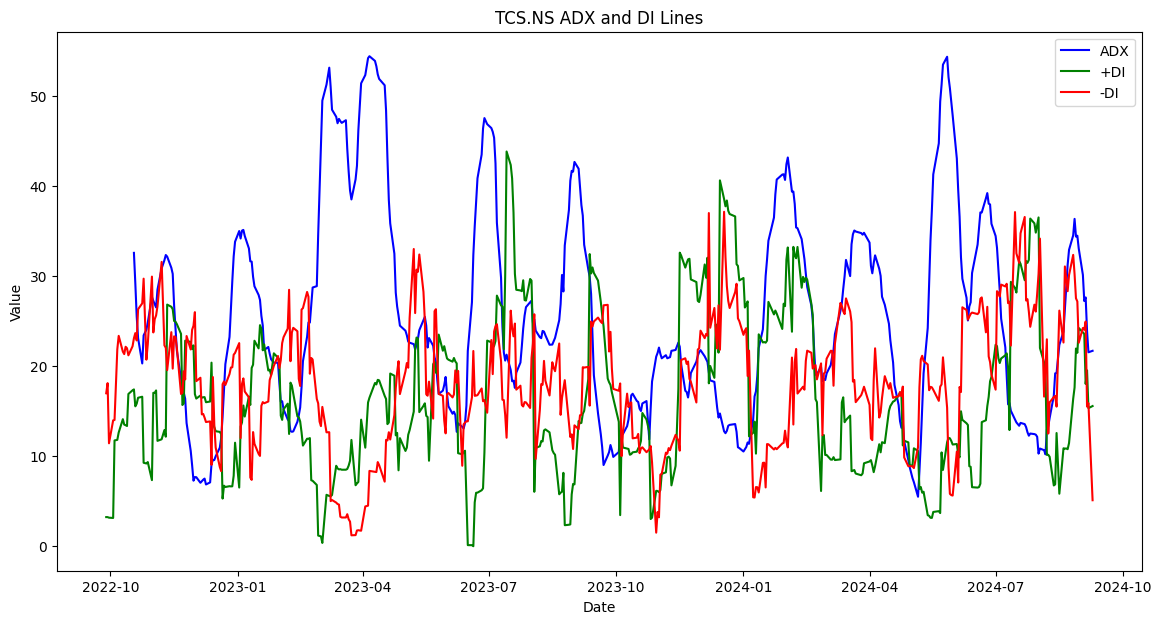

                  Close        +DI        -DI        ADX
Date                                                    
2024-09-03  4512.350098  23.569576  24.050726  27.230692
2024-09-04  4479.250000  18.023341  24.959927  27.636858
2024-09-05  4475.950195  19.537042  15.506919  23.918751
2024-09-06  4456.750000  15.335474  15.890076  21.541050
2024-09-09  4449.549805  15.570633   5.108119  21.707131


In [33]:
df['Prev Close'] = df['Close'].shift(1)
df['TR'] = pd.concat([
    df['High'] - df['Low'],
    (df['High'] - df['Prev Close']).abs(),
    (df['Low'] - df['Prev Close']).abs()
], axis=1).max(axis=1)

df['+DM'] = df['High'].diff()
df['-DM'] = df['Low'].diff()
df['+DM'] = df.apply(lambda row: row['+DM'] if (row['+DM'] > row['-DM']) and (row['+DM'] > 0) else 0, axis=1)
df['-DM'] = df.apply(lambda row: row['-DM'] if (row['-DM'] > row['+DM']) and (row['-DM'] > 0) else 0, axis=1)

df['ATR'] = df['TR'].rolling(window=14).mean()
df['+DI'] = (df['+DM'].rolling(window=14).mean() / df['ATR']) * 100
df['-DI'] = (df['-DM'].rolling(window=14).mean() / df['ATR']) * 100

df['DX'] = (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])) * 100
df['ADX'] = df['DX'].rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['ADX'], label='ADX', color='blue')
plt.plot(df['+DI'], label='+DI', color='green')
plt.plot(df['-DI'], label='-DI', color='red')
plt.title('TCS.NS ADX and DI Lines')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

print(df[['Close', '+DI', '-DI', 'ADX']].tail())


In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ma,ema,%k,%d,...,Chikou Span,Prev Close,TR,+DM,-DM,ATR,+DI,-DI,DX,ADX
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-09,3195.000000,3233.500000,3168.500000,3217.649902,3062.515869,1561185,NaN,3217.649902,NaN,NaN,...,3144.699951,NaN,65.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-09-12,3239.899902,3269.800049,3225.000000,3242.949951,3086.596436,1785928,NaN,3221.023242,NaN,NaN,...,3121.850098,3217.649902,52.150146,0.0,56.5,NaN,NaN,NaN,NaN,NaN
2022-09-13,3263.449951,3263.449951,3225.000000,3229.350098,3073.651855,1972678,NaN,3222.133490,NaN,NaN,...,3157.300049,3242.949951,38.449951,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-09-14,3135.000000,3141.399902,3113.800049,3120.399902,2969.954346,5090269,NaN,3208.569011,NaN,NaN,...,3137.399902,3229.350098,115.550049,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-09-15,3130.000000,3137.750000,3100.000000,3104.350098,2954.678711,2138023,NaN,3194.673156,NaN,NaN,...,3161.699951,3120.399902,37.750000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
